# CNN Model for Image Classification with CIFAR-10 dataset

Model was built using Tensorflows documentation for creating Convolutional Neural Network
https://www.tensorflow.org/tutorials/images/cnn


## Import all necessary Tensorflow and Keras libraries for creating CNN's

In [91]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import datasets, layers, models
import os

## Load Datasets


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape # should output number of images, dimensions, dimensions, number of rgb channels

(50000, 32, 32, 3)

## Reshape data

In [4]:
# with .reshape() method,  pass -1 as first arg for no effect
# pass nothing as second arg since we want no effect
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

## Declare classes of the images

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
len(classes)

10

## Create function to display images

In [7]:
def plot_image(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

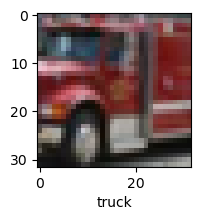

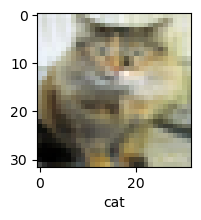

In [9]:
plot_image(X_train, y_train, 88)
plot_image(X_train, y_train, 169)

## Normalize our data

Whenever we have an image we have to divide each pixel value by 255 bcos the pixels values are 255 for R G B channels.

Dividing by 255 would normalize the value to a 0 to 1 range

In [10]:
X_train = X_train / 255
X_test = X_test / 255

## Build a CNN model

This model is simple and only has 2 layers with RELU as the activation function

In [60]:
# create a sequential model
model = Sequential()
# add a 1st Convolutional layer to it
# 32 different filters
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation="relu", input_shape=(32,32,3)))
# add Max Pooling layer, goes through the image and picks maximum values of pixels
model.add(MaxPooling2D(pool_size=(2,2)))

# add another layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten output in order to pass it to the Dense layer
model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

Can also create a new CNN with this syntax and different parameters. This is an example:

In [15]:
cnn = models.Sequential([

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Input Layer the 1st Layer is a flatten Layer
    layers.Flatten(input_shape=(32,32,3)),
    # 2 Deep Layers of 3000 and 1000 neurons
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    # Last Layer has 10 neurons since we have 10 categories to pick from
    layers.Dense(10, activation = 'sigmoid')
])

## Compile model

In [92]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train Model

In [93]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=5)

Epoch 1/5


c:\Users\biyen\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 23s 14ms/step - loss: 0.5646 - accuracy: 0.8028 - val_loss: 1.0096 - val_accuracy: 0.6878
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5443 - accuracy: 0.8081 - val_loss: 1.0023 - val_accuracy: 0.6921
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5339 - accuracy: 0.8146 - val_loss: 1.0327 - val_accuracy: 0.6884
Epoch 4/5
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5202 - accuracy: 0.8175 - val_loss: 1.0641 - val_accuracy: 0.6777
Epoch 5/5
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5042 - accuracy: 0.8236 - val_loss: 1.0675 - val_accuracy: 0.6865


## Make predictions

In [94]:
y_pred = model.predict(X_test)
# outputs 10 different values outputed by our 10 output neurons/classes

313/313 [==============================] - 2s 5ms/step


In [95]:
# we need the maximum value of the 10 which corresponds to the probability with heighest class
y_pred = [np.argmax(arr) for arr in y_pred]

In [96]:
# reshape y test data
y_test = y_test.reshape(-1,)

## Sample Prediction from our CNN model

We will try to make a prediction for image with index 48

In [80]:
model_pred = y_pred[48]
str1 = f"Model's prediction for image with index 48: {model_pred}"
print(str1)

Model's prediction for image with index 48: 7


The outputed class is 7 and that corresponds to horse

In [81]:
class_pred = classes[7]
str2 = f"The corresponding class is: {class_pred}"
print(str2)

The corresponding class is: horse


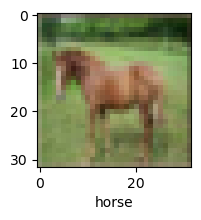

In [82]:
plot_image(X_test, y_test, 48)

The prediction of the model was correct for this index but since the accuracy was only **68.65%** accuracte other predictions may be wrong

## Report of Accuracy

In [83]:
from sklearn.metrics import classification_report

## Confusion Matrix

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1000
           1       0.82      0.79      0.80      1000
           2       0.61      0.58      0.59      1000
           3       0.56      0.45      0.49      1000
           4       0.61      0.67      0.64      1000
           5       0.63      0.59      0.61      1000
           6       0.74      0.76      0.75      1000
           7       0.74      0.72      0.73      1000
           8       0.81      0.77      0.79      1000
           9       0.66      0.89      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



## Evaluate model with a graph

313/313 - 1s - loss: 1.0675 - accuracy: 0.6865 - 1s/epoch - 4ms/step


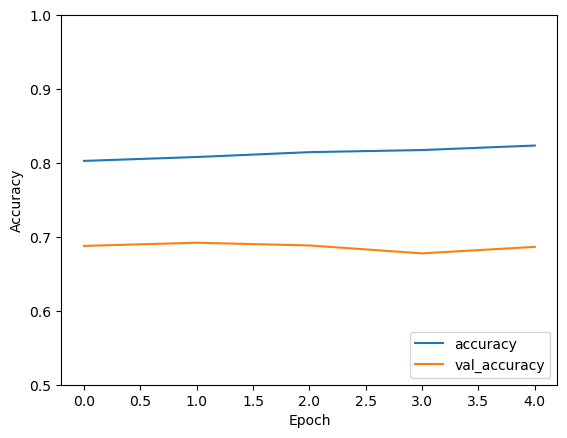

In [107]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [106]:
# Test Accuracy of the model
acc = test_acc*100
str3 = f"The Accuracy of our model is: {acc}%"
print(str3)

The Accuracy of our model is: 68.65000128746033%
